### Import danych giełdowych z bazy Stooq

In [39]:
from datetime import datetime
import pandas as pd
from pandas_datareader import data as web
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
pd.plotting.register_matplotlib_converters()

# for symbol in ['fte.pl', 'wig20.pl', 'aapl']:
#     symbol
symbol = input("Wprowadż symbol akcji lub indeksu: ") 
df = web.DataReader(str(symbol), 'stooq')
df.head()

Wprowadż symbol akcji lub indeksu: fte.pl


,Open,High,Low,Close,Volume
Date,,,,,
2019-09-06,25.25,25.65,24.55,25.15,7523
2019-09-05,24.50,25.00,24.30,25.00,3329
2019-09-04,24.95,25.00,24.70,24.90,1145
2019-09-03,24.85,24.90,24.55,24.90,413
2019-09-02,25.00,25.15,24.70,25.00,589


In [37]:
df['Date'] = df.index

In [38]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Date'], dtype='object')

In [35]:
df = df.reset_index(drop=True)

In [19]:
cols = list(df.columns)

In [20]:
df = df[[cols[-1]] + cols[0:5]]

In [21]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2019-09-06,214.05,214.42,212.51,213.26,19362294.0
1,2019-09-05,212.00,213.97,211.51,213.28,23946984.0
2,2019-09-04,208.39,209.48,207.32,209.19,19216820.0
3,2019-09-03,206.43,206.98,204.22,205.70,20059574.0
4,2019-08-30,210.16,210.45,207.20,208.74,21162561.0


In [22]:
df['Mean'] = (df['High'] + df['Low']) / 2
df.head()

,Date,Open,High,Low,Close,Volume,Mean
0,2019-09-06,214.05,214.42,212.51,213.26,19362294.0,213.465
1,2019-09-05,212.00,213.97,211.51,213.28,23946984.0,212.740
2,2019-09-04,208.39,209.48,207.32,209.19,19216820.0,208.400
3,2019-09-03,206.43,206.98,204.22,205.70,20059574.0,205.600
4,2019-08-30,210.16,210.45,207.20,208.74,21162561.0,208.825


In [25]:
date_from = input('Pokaż notowania od (RRRR-MM-DD): ')

Pokaż notowania od (RRRR-MM-DD): 2017-11-11


In [26]:
from_2017 = df.loc[df['Date'] >= date_from]

In [27]:
x = list(from_2017['Date'])

In [28]:
y = list(from_2017['Mean'])

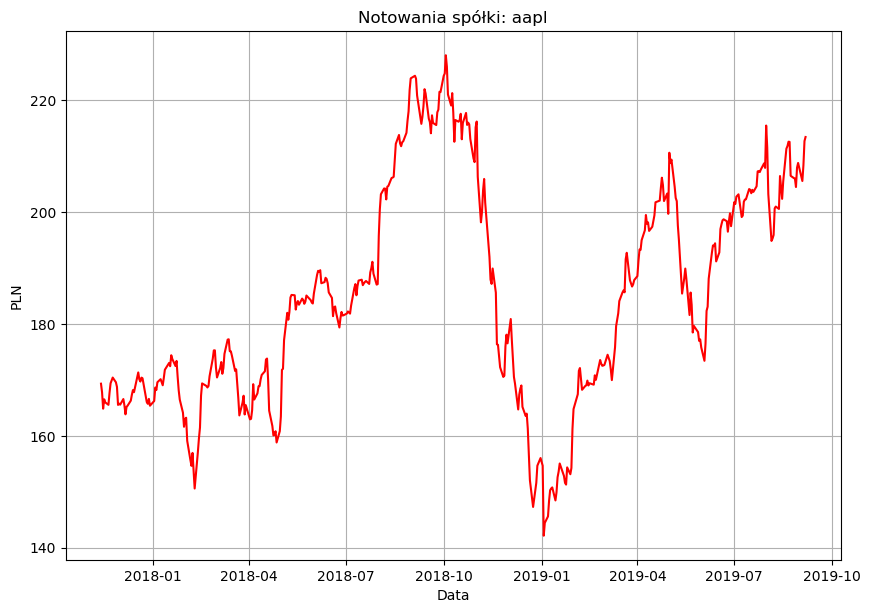

In [29]:
plt.figure(figsize=(10,7), dpi=100)
# xmin = min(x)
# xmax = max(x)
plt.plot(x, y, color='red', marker='', linestyle='solid')
# plt.axis([xmin, xmax, 0, 90])
plt.title(f"Notowania spółki: {symbol}")
plt.ylabel('PLN')
plt.xlabel("Data")
plt.grid()
plt.show()